# Cluebot

In [295]:
## We first load in packages we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import xml.etree.ElementTree as ET

In [296]:
tree = ET.parse('/Users/robin/Documents/GitHub/Cluebot/train-edits.xml')
root = tree.getroot()

print(len(root))

for i in range(0, len(root)):
    if root[i][11][2].text != root[i][12][1].text:
        print("!")

15046


In [297]:
edit_id_collection = []
is_vandalism_values = []

for i in range(0, len(root)):
    edit_id_collection.append(int(root[i][1].text))
    if root[i][3].text == "true":
        is_vandalism_values.append(1)
    else:
        is_vandalism_values.append(0)

print(edit_id_collection)
print(is_vandalism_values)

[327231971, 327232052, 327232115, 327232194, 327232220, 327232501, 327232632, 327233017, 327233218, 327233267, 327233416, 327233577, 327233596, 327233598, 327233602, 327233697, 327233819, 327233875, 327233884, 327233987, 327234284, 327234327, 327234633, 327234840, 327234948, 327235026, 327235309, 327235593, 327235970, 327236077, 327236265, 327236357, 327236382, 327236416, 327236534, 327236550, 327236632, 327236641, 327236846, 327237281, 327237289, 327237474, 327237669, 327237891, 327237997, 327238153, 327238336, 327238665, 327238722, 327238842, 327238870, 327239039, 327239241, 327239642, 327239762, 327239803, 327240021, 327240254, 327240417, 327240436, 327240476, 327240504, 327240795, 327240827, 327240897, 327240905, 327240945, 327241278, 327241681, 327241722, 327241791, 327242121, 327242265, 327242290, 327242385, 327242400, 327242497, 327242662, 327242846, 327243221, 327243272, 327243285, 327243433, 327243482, 327243598, 327244105, 327244218, 327244299, 327244465, 327244642, 327244754

In [298]:
# import requests

# url = "https://auth.enterprise.wikimedia.com/v1/login"
# headers = {"Content-Type": "application/json"}
# payload = {
#    "username": "",  # replace with your actual username
#     "password": ""         # replace with your actual password
# }
# response = requests.post(url, json=payload, headers=headers)
# data = response.json()

# print(data.get("id_token"))
# print(data.get("access_token"))
# print(data.get("refresh_token"))
# print(data.get("expires_in"))

In [299]:
import requests

parent_text_collection = []
current_text_collection = []

base_url = "https://en.wikipedia.org/w/api.php"

for i in range(100):
    # Step 1: Get revision and its parent
    params = {
        "action": "query",
        "format": "json",
        "prop": "revisions",
        "revids": edit_id_collection[i],
        "rvprop": "ids|content",
        "rvslots": "main"
    }

    response = requests.get(base_url, params=params)
    data = response.json()

    pages = data['query']['pages']
    page = next(iter(pages.values()))
    revision = page['revisions'][0]

    current_text = revision['slots']['main']['*']
    parent_id = revision['parentid']

    # Step 2: Get parent revision content
    params['revids'] = parent_id
    response2 = requests.get(base_url, params=params)
    data2 = response2.json()

    pages2 = data2['query']['pages']
    parent_page = next(iter(pages2.values()))
    parent_text = parent_page['revisions'][0]['slots']['main']['*']

    # Step 3: Print the before and after
    # print("=== BEFORE (Parent Revision) ===\n")
    # print(parent_text[:1000])  # Trim for readability
    # print("\n=== AFTER (Current Revision) ===\n")
    # print(current_text[:1000])

    parent_text_collection.append(parent_text)
    current_text_collection.append(current_text)

In [300]:
import difflib
import re

vandalism_words_count = {}
constructive_words_count = {}

def tokenize(text):
    # Basic word tokenizer — lowercase, removes punctuation
    return re.findall(r'\b\w+\b', text.lower())

for i in range(100):
    # Assume you already have these from the revisions:
    # parent_text_collection = text before the edit
    # current_text_collection = text after the edit

    diff = difflib.unified_diff(
        parent_text_collection[i].splitlines(),
        current_text_collection[i].splitlines(),
        fromfile='before',
        tofile='after',
        lineterm=''
    )

    added_lines = []
    deleted_lines = []

    for line in diff:
        if line.startswith('+++') or line.startswith('---') or line.startswith('@@'):
            continue  # skip headers
        elif line.startswith('+'):
            added_lines.append(line[1:])
        elif line.startswith('-'):
            deleted_lines.append(line[1:])

    # Print results
    # print("=== ADDED LINES ===")
    # for line in added_lines:
    #     print(line)

    # print("\n=== DELETED LINES ===")
    # for line in deleted_lines:
    #     print(line)

    if len(added_lines) != 0: 
        words = tokenize(added_lines[0])
    for j in range(len(added_lines)):
        words += tokenize(added_lines[j])
    
    is_vandalism = is_vandalism_values[i]
    for word in words:
        if is_vandalism == 1:
            if word in vandalism_words_count:
                vandalism_words_count[word] += 1
            else:
                vandalism_words_count[word] = 1
        else:
            if word in constructive_words_count:
                constructive_words_count[word] += 1
            else:
                constructive_words_count[word] = 1

print(vandalism_words_count)
print(constructive_words_count)



{'title': 6, 'tre': 2, 'cool': 2, 'bio': 2, 'i': 2, 'threw': 2, 'up': 4, 'max': 2, 'headroom': 2, 'incident': 2, 'montana': 2, '50': 2, 'ounces': 2, 'bitch': 2, 'ricky': 1, 'reyes': 1, 'aside': 1, 'from': 5, 'being': 1, 'a': 30, 'boxer': 1, 'is': 12, 'also': 5, 'popular': 3, 'hairdresser': 1, 'in': 15, 'the': 67, 'philippines': 1, 'he': 13, 'gay': 1, 'early': 6, 'real': 2, 'time': 2, 'strategy': 2, 'games': 8, 'often': 2, 'allowed': 2, 'multiplayer': 2, 'play': 6, 'over': 6, 'modem': 2, 'or': 12, 'local': 2, 'network': 2, 'as': 14, 'internet': 6, 'started': 2, 'to': 32, 'grow': 2, 'during': 8, '1990s': 4, 'software': 2, 'was': 16, 'developed': 2, 'that': 6, 'would': 4, 'allow': 4, 'players': 8, 'tunnel': 2, 'lan': 2, 'protocols': 2, 'used': 2, 'by': 10, 'late': 2, 'most': 4, 'rts': 2, 'had': 2, 'native': 2, 'support': 2, 'allowing': 2, 'all': 10, 'globe': 2, 'with': 6, 'each': 2, 'other': 4, 'services': 2, 'were': 14, 'created': 4, 'be': 6, 'automatically': 2, 'matched': 2, 'against': 

In [301]:
word_probs = {}
for word in list(vandalism_words_count.keys()):
    if word in constructive_words_count:
        constructive_number = constructive_words_count[word]
    else:
        constructive_number = 0
    word_probs[word] = (vandalism_words_count[word] + 1) / (vandalism_words_count[word] + constructive_number + 2)

print(word_probs)

{'title': 0.0546875, 'tre': 0.75, 'cool': 0.75, 'bio': 0.42857142857142855, 'i': 0.05084745762711865, 'threw': 0.75, 'up': 0.19230769230769232, 'max': 0.75, 'headroom': 0.75, 'incident': 0.5, 'montana': 0.75, '50': 0.2727272727272727, 'ounces': 0.75, 'bitch': 0.42857142857142855, 'ricky': 0.6666666666666666, 'reyes': 0.6666666666666666, 'aside': 0.6666666666666666, 'from': 0.030456852791878174, 'being': 0.1, 'a': 0.04806201550387597, 'boxer': 0.3333333333333333, 'is': 0.040880503144654086, 'also': 0.06818181818181818, 'popular': 0.5, 'hairdresser': 0.6666666666666666, 'in': 0.019115890083632018, 'the': 0.03023566029346376, 'philippines': 0.4, 'he': 0.061946902654867256, 'gay': 0.6666666666666666, 'early': 0.18421052631578946, 'real': 0.5, 'time': 0.06, 'strategy': 0.6, 'games': 0.6428571428571429, 'often': 0.2, 'allowed': 0.6, 'multiplayer': 0.75, 'play': 0.5384615384615384, 'over': 0.11864406779661017, 'modem': 0.75, 'or': 0.1015625, 'local': 0.25, 'network': 0.42857142857142855, 'as'

In [ ]:
import re
import functools

def get_word_prob(word, default=0.5):
    # Return P(vandalism | word) or 0.5 for unknown words
    return word_probs.get(word, default)

def combine_probs(word_probs):
    eps = 1e-6  # for numerical stability
    prod_p = functools.reduce(lambda x, y: x * max(min(y, 1 - eps), eps), word_probs, 1.0)
    prod_1mp = functools.reduce(lambda x, y: x * max(min(1 - y, 1 - eps), eps), word_probs, 1.0)
    return prod_p / (prod_p + prod_1mp)

def vandalism_score(edit_text):
    words = tokenize(edit_text)
    per_word_scores = [get_word_prob(w) for w in words]
    return combine_probs(per_word_scores)

2009


In [409]:
from datetime import datetime, timezone
import ipaddress

def is_ip(user):
    try:
        ipaddress.ip_address(user)
        return True
    except ValueError:
        return False

def compute_user_credit_score(user, user_edit_count, user_warns, user_reg_time, current_time, user_distinct_pages):
    # If the user is anonymous (only has IP address), then the user_reg_time has a different length.
    if len(user_reg_time) > 10:
        account_age_days = 1
    else:
        reg_time = datetime.fromtimestamp(int(user_reg_time), tz=timezone.utc)
        edit_time = datetime.fromtimestamp(int(current_time), tz=timezone.utc)
        account_age_days = max((edit_time - reg_time).days, 1)

    # Normalized features
    f_age = min(1.0, account_age_days / 365)              # cap at 1 year
    f_edits = min(1.0, user_edit_count / 1000)            # cap at 1000 edits
    f_pages = 0.5  # default
    if user_distinct_pages is not None:
        f_pages = min(1.0, user_distinct_pages / 200)     # cap at 200 pages
    f_warns = min(1.0, user_warns / 3)                    # cap warning penalty at 3
    f_anon = 1.0 if is_ip(user) else 0.0

    # Weights
    w_age = 0.2
    w_edits = 0.15
    w_pages = 0.15
    w_warns = 0.5
    w_anon = 0.6

    # Credit score
    score = w_age * f_age + w_edits * f_edits + w_pages * f_pages - w_warns * f_warns - w_anon * f_anon
    return max(0.0, min(1.0, score))

def compute_article_susceptibility(page_made_time, current_time, num_recent_reversions):
    current_time = datetime.now(timezone.utc)
    made_time = datetime.fromtimestamp(page_made_time, tz=timezone.utc)
    age_days = max((current_time - made_time).days, 1)

    # Normalized features
    f_reverts = min(1.0, num_recent_reversions / 5)
    f_recency = min(1.0, 30 / age_days)

    # Weights
    w_reverts = 0.7
    w_recency = 0.3

    score = (
        w_reverts * f_reverts +
        w_recency * f_recency
    )

    return max(0.0, min(1.0, score))


In [413]:
import matplotlib.pyplot as plt

user_credit_score_list = [compute_user_credit_score(edit.find("user").text, int(edit.find("user_edit_count").text), int(edit.find("user_warns").text), edit.find("user_reg_time").text, edit.find("current").find("timestamp").text, int(edit.find("user_distinct_pages").text)) for edit in root]
article_susceptibility_list = [compute_article_susceptibility(int(edit.find("common").find("page_made_time").text), edit.find("current").find("timestamp").text, int(edit.find("common").find("num_recent_reversions").text)) for edit in root]
is_vandalism_list = [edit.find("isvandalism").text for edit in root]

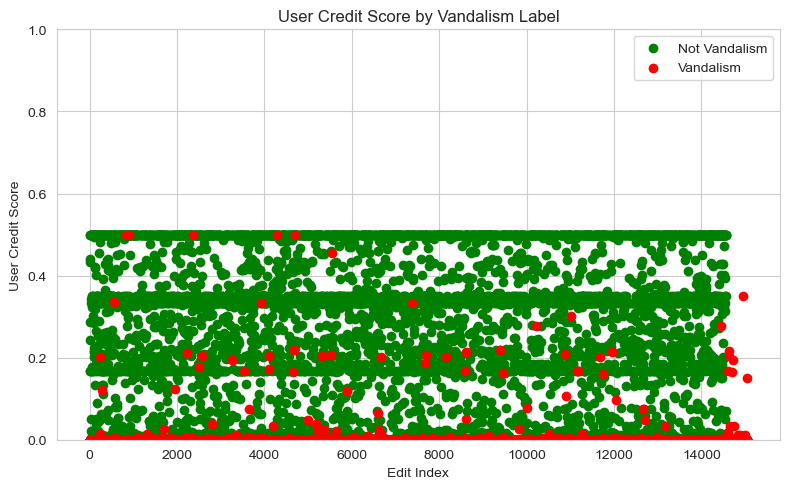

7848


In [420]:
# Get indices and values for each class
non_vandal_x = [i for i, v in enumerate(is_vandalism_list) if v == "false"]
non_vandal_y = [user_credit_score_list[i] for i in non_vandal_x]

vandal_x = [i for i, v in enumerate(is_vandalism_list) if v == "true"]
vandal_y = [user_credit_score_list[i] for i in vandal_x]

# Plot: green first, red second
plt.figure(figsize=(8, 5))
plt.scatter(non_vandal_x, non_vandal_y, color='green', label='Not Vandalism')
plt.scatter(vandal_x, vandal_y, color='red', label='Vandalism')  # overlaid

plt.xlabel("Edit Index")
plt.ylabel("User Credit Score")
plt.title("User Credit Score by Vandalism Label")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

n = 0
for i in range(len(is_vandalism_list)):
    if user_credit_score_list[i] < 0.05 and is_vandalism_list[i] == "false":
        n += 1
print(n)

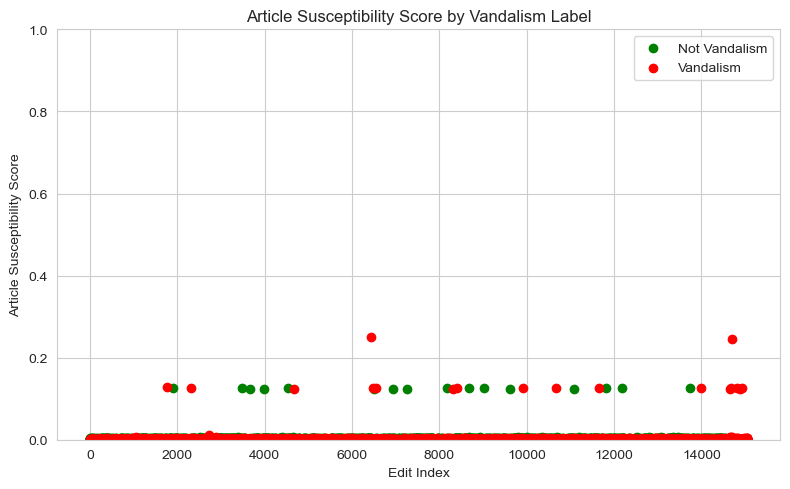

In [411]:
# Get indices and values for each class
non_vandal_x = [i for i, v in enumerate(is_vandalism_list) if v == "false"]
non_vandal_y = [article_susceptibility_list[i] for i in non_vandal_x]

vandal_x = [i for i, v in enumerate(is_vandalism_list) if v == "true"]
vandal_y = [article_susceptibility_list[i] for i in vandal_x]

# Plot: green first, red second
plt.figure(figsize=(8, 5))
plt.scatter(non_vandal_x, non_vandal_y, color='green', label='Not Vandalism')
plt.scatter(vandal_x, vandal_y, color='red', label='Vandalism')  # overlaid


plt.xlabel("Edit Index")
plt.ylabel("Article Susceptibility Score")
plt.title("Article Susceptibility Score by Vandalism Label")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [389]:
import pandas as pd

edits = pd.read_xml('/Users/robin/Documents/GitHub/Cluebot/train-edits.xml')
print(edits.sample(5))

      EditType     EditID                                            comment  \
7519    change  328464696  [[WP:UNDO|Undid]] revision 328134963 by [[Spec...   
1674    change  327487151                                               None   
2338    change  327586465                                      /* Week 10 */   
2264    change  327573924                                     /* Meetings */   
10765   change  329135979                              /* Queensland */ typo   

       isvandalism             user  user_edit_count  user_distinct_pages  \
7519         False    75.21.198.194                8                    1   
1674         False  213.121.172.195              348                  119   
2338         False     Onesmallnote             6674                  255   
2264         False   69.224.150.205               80                    6   
10765        False           Mokgen             1770                  611   

       user_warns   user_reg_time       prev_user  commo

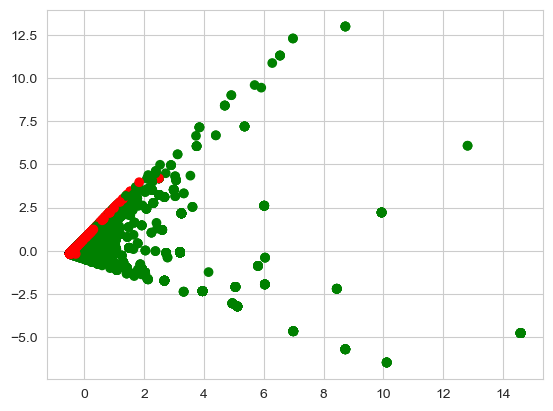

In [390]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = Pipeline([("scale", StandardScaler()), ("pca", PCA(n_components=2))])


X = edits.get(["user_edit_count", "user_warns", "user_distinct_pages"])
y = edits["isvandalism"]
pipe.fit(X)

colors = {True:'r', False:'g'}
plt.scatter(pipe.transform(X)[:,0], pipe.transform(X)[:,1], c = y.map(colors))
plt.show()
